In [166]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge
from sklearn.decomposition import TruncatedSVD, KernelPCA, PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import zoom
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos
from sklearn.metrics import hamming_loss
from skimage.exposure import equalize_hist,equalize_adapthist

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save

In [167]:
prep_ = lambda i:cap(i)
def prep(a):
  return np.array(map(prep_single,a))

prep_single = lambda xs:map(prep_,xs)

cap = lambda p: 0 if p < 0.5 else 1
def pred_to_rgb(p):
  p = cap(p)
  v = p
  return (1-v,v,0.2)

y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
TO_RADIANS = pi/180

In [ ]:
space = 15 # 35,50,70,100,150
hSize = 0#space-1
bins = np.linspace(1,1700,space)
#bins = np.linspace(0,1,space)
sbins = bins[:-1]+1800/space/2

r_division = 7
theta_division = 7
phi_division = 7
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin

x_division = 3
y_division = 3
z_division = 3

#ranges = [1,x_division,y_division,z_division]
#nBlocks = x_division*y_division*z_division
ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division
fnameSpherical = "spherical_every2.npy"
xSpherical = np.load(fnameSpherical)

bSize = hSize+2 # bsize means blockSize
ds = nBlocks*bSize # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: np.array(range(idxHist(i)+hSize,idxHist(i)+hSize+many))

blockNr2Pos = np.zeros((nBlocks,3))

verboseIdx = lambda i: ["Block #",i/bSize," at",blockNr2Pos[i/bSize],"isHist:",i%bSize<hSize," and bin",i%bSize," or stat",i%bSize-hSize]


print "Number of Blocks:",nBlocks
print "Size of Histograms:",hSize
print "Numbers per Block:",bSize
print "Dimensions: ca.",nBlocks*bSize

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

fromtoSpherical = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

from skimage.filters import sobel

#name = "output/"+str(space)+"_split_validated"
#fname = "many_hists_"+str(nBlocks)+"_space" + str(space) + ("_divs_%s_%s_%s.npy" % (r_division,theta_division,phi_division))

fname = "many_hists_histsSize%ssmoothed_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "output/%s" % fname[:-4]


def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    iD = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > iD+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        iD = i
      
      #n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      #filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      #Xtotal,Ytotal,Ztotal = (176,208,176)
      #data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      #data = data[35:130,40:150,10:100]

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      i0=0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        i1=0
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          i2=0
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            
            blockNr2Pos[hCount] = [i0,i1,i2]
            
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            #cut = equalize_hist(cut)
            #sb = sobel(np.max(cut,axis=2))
            #h=np.histogram(cut.ravel(),bins=bins)[0]
            #xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = h
            k0,k1,k2 = cut.shape
            pos = np.arange(k0).reshape((k0,1,1)) + np.arange(k1).reshape((1,k1,1)) + np.arange(k2).reshape((1,1,k2))
            pos2 = pos*pos
            avg = np.average(cut)
            std = np.std(cut)
            xa[i,idxsFor(hCount,2)] = [avg,std]
            #xa[i,idxsFor(hCount,2)+2] = [np.sum(pos*cut),np.sum(pos2*cut)]
            #xa[i,idxsFor(hCount,2)+4] = [np.average(sb),np.std(sb)/np.average(sb)]
            hCount = hCount + 1
            i2 = i2+1
          i1 = i1+1
        i0 = i0+1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if True:
  loadAndPreprocess()

#xa = np.load("many_hists144_space70_divs_6_4_6.npy")
xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

print "Example:",xa[0,:20],"..."

Number of Blocks: 343
Size of Histograms: 0
Numbers per Block: 2
Dimensions: ca. 686
  i = 2 ... 0.5%
  i = 5 ... 1.2%
  i = 10 ... 2.4%
  i = 19 ... 4.6%


0.0 


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


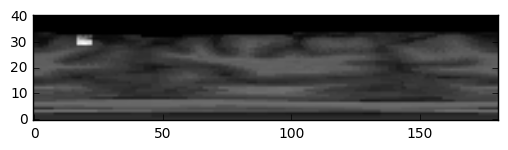

12.5 


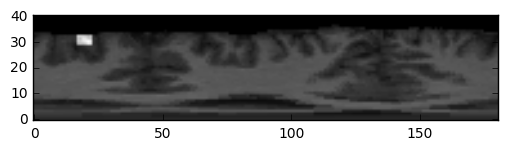

25.0 


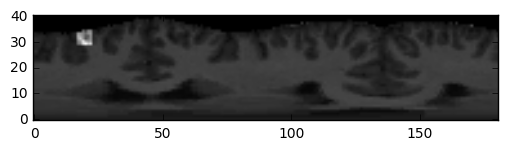

37.5 ('<', '==========')


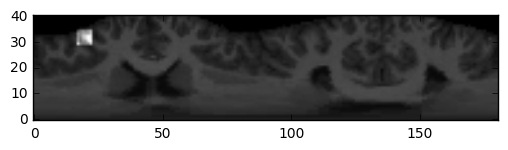

50.0 ('<', '==========')


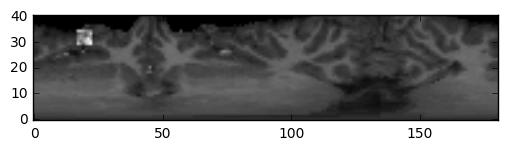

62.5 


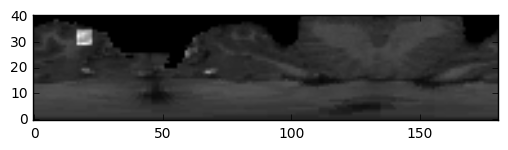

75.0 


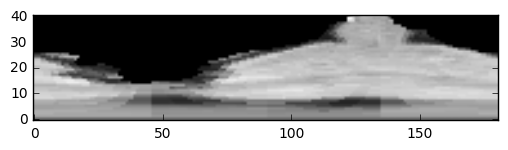

In [173]:
if True:
  i = 413
  for it,theta in enumerate(np.linspace(0,xSpherical[i].shape[1]-1,ranges[1])):
    print theta,("<","="*10) if 3<=it<5 else ""
    c = np.array(xSpherical[i,:,theta,:],copy=True)
    c[int(5*c.shape[0]/ranges[0]):int(6*c.shape[0]/ranges[0]),int(3*c.shape[0]/7):int(4*c.shape[0]/7.0)] = c[int(5*c.shape[0]/7):int(6*c.shape[0]/7.0),int(3*c.shape[0]/7):int(4*c.shape[0]/7.0)]*4
    plt.imshow(c, cmap="gray", origin="lower")
    plt.show()

In [158]:
from sklearn.model_selection import train_test_split

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

# xtr. training data
# ytr. training targets
# xts. validation data
# yts. validation targets

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b]
Ntypes = len(types)

def get_by(t,ys):
    idxs = range(0,len(ys))
    return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = np.array([get_by(t,y) for t in types])
ratios = [float(len(i))/n_max for i in typeIdxs]

def show_diff_for(name,es1,es2,total):
  es = map(lambda x,y:x-y,es1,es2)
  abses = map(abs,es)
  print name,"contains",sum(abses)/2,"samples of total",total,": %0.2f%%" % (100*float(sum(abses))/total)
  for i in range(0,8):
      tp = ((100*float(es[i])/total),types[i],es[i])
      print "  %0.2f%%: %s with samples: #%s" % tp

def show_diff(name,es1,es2):
  es1 = map(len,es1)
  es2 = map(len,es2)
  show_diff_for(name,es1,es2,total=sum(es1))

def show_for(name,es):
  es1 = map(lambda x:len(x),es)
  show_diff_for(name,es1,[0]*8,sum(es1))


def doSplit(test_size=0.25,rs=1,show=False):
  typeIdxsTR = []
  typeIdxsTS = []

  for i in range(0,Ntypes):
      atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=test_size)
      typeIdxsTR.append(atr)
      typeIdxsTS.append(ats)

  typeIdxsTR = np.array(typeIdxsTR)
  typeIdxsTS = np.array(typeIdxsTS)


  # gender: 1 = female, 0 = male
  # age: 1 = young, 0 = old
  # health: 1 = healthy, 0 = sick

  if show:
    show_for("public Training",typeIdxs)
    show_for("our Training",typeIdxsTR)
    show_for("our Test",typeIdxsTS)

  xtr = np.vstack([x[idxs]for idxs in typeIdxsTR])
  xts = np.vstack([x[idxs]for idxs in typeIdxsTS])
  ytr = np.vstack([y[idxs]for idxs in typeIdxsTR])
  yts = np.vstack([y[idxs]for idxs in typeIdxsTS])
  
  return (typeIdxsTR,typeIdxsTS,xtr,xts,ytr,yts)

# [0,1,1] => [0,0,0,1,0,0,0,0]
def binary2monadic(y):
  ys = np.zeros((len(y),1))
  for i,yi in enumerate(y):
    # ys[i,int(yi[0]*4+yi[1]*2+yi[2])] = 1
    ys[i] = int(yi[0]*4+yi[1]*2+yi[2])
  return ys

convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])
#convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])

def monadic2binary(y):
  #return np.array([convertInt(list(yi).index(1)) for yi in y])
  return np.array([convertInt(yi) for yi in y])

def continousMonadic2binary(y):
  ys = np.zeros((len(y),3))
  for i,yi in enumerate(y):
    #gender
    """a,b = (np.sum(yi[:4]),np.sum(yi[4:]))
    ys[i,0] = b/(a+b)
    #age
    a,b = (np.sum(yi[0:8:4]+yi[1:8:4]),np.sum(yi[2:8:4]+yi[3:8:4]))
    ys[i,1] = b/(a+b)

    #health
    a,b = (np.sum(yi[0:8:2]),np.sum(yi[1:8:2]))
    ys[i,2] = b/(a+b)"""
    ys[i] = convertInt(np.argmax(yi))
  return ys

In [159]:
def prep_by_percentage(pi):
  nElems = len(pi)
  pi = pi.reshape((nElems,3))
  samplesNeeded = np.rint(np.floor(np.array(ratios)*0.7*nElems))
  for r in range(0,nElems):
    s = np.array(samplesNeeded,copy=True)
    s[s <= 0] = np.max(s)+1
    if len(samplesNeeded[samplesNeeded>0]) is 0:
      break
    i = np.argmin(s)
    ti = np.array(types[i])
    # find nearest prediction for this type
    dx = pi-ti
    dx[dx==0] = np.max(dx)+1
    j = np.argmin(np.sum(dx*dx,axis=1))
    pi[j] = ti
    samplesNeeded[i]=samplesNeeded[i]-1
  
  return np.array(prep(pi))
  
# prep_single_by_percentage(np.random.random((50,3)))

In [160]:
def visualize(labelName,y_pred,model,do,prefix):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"
  if do[0] is "a":
    plt.plot(model.estimator_errors_)
    plt.title("Estimator errors")
    plt.savefig(prefix+"_"+str(labelName)+".png")
    plt.show()
  if do is "rf":
    print "Out-of-bag Score: %s" % model.oob_score_
    a = model.feature_importances_
    ai = np.argsort(-a)
    print "Important features: %s..." % ai[:6]
    for i in ai[:6]:
      print verboseIdx(i)
    plt.plot(a[ai])
    plt.show()
    print "\n"
  if do is "ks":
    print "Using #",len(model.support_),"# support vectors"
  if do is "aks":
    print "Using average #",np.average([len(m.support_) for m in model.estimators_]),"# support vectors"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

def applyClassification(classf,label,preprocess=None,uni=False,addXTR=None,addXTS=None,addX_T=None,split=None):
  prefix_str,model = classf
  (_,_,xtr,xts,ytr,yts) = split
  if label is None:
    get_label = lambda ys: ys
  else:
    get_label = lambda ys: ys[:,label]
  if addXTR is None:
    xtr1 = xtr
    xts1 = xts
    x_t1 = x_t
  else:
    xtr1 = np.concatenate((xtr,addXTR),axis=1)
    xts1 = np.concatenate((xts,addXTS),axis=1)
    x_t1 = np.concatenate((x_t,addX_T),axis=1)
  
  # normalize data
  xtrAvg = np.average(xtr,axis=0)
  xtrStdDev = np.std(xtr,axis=0)
  xtr1 = (xtr1 - xtrAvg)/(xtrStdDev+0.00001)
  xts1 = (xts1 - xtrAvg)/(xtrStdDev+0.00001)
  x_t1 = (x_t1 - xtrAvg)/(xtrStdDev+0.00001)
  
  xtr1 = preprocess.fit_transform(xtr1) if preprocess is not None else xtr1
  xts1 = preprocess.transform(xts1) if preprocess is not None else xts1
  x_t1 = preprocess.transform(x_t1) if preprocess is not None else x_t1
  
  yts_pred = model.fit(xtr1,get_label(ytr)).predict(xts1)
  ytr_pred = model.predict(xtr1)
  y_t_pred = model.predict(x_t1)
  
  if not uni:
    #y_t_pp = prep_single(y_t_pred)
    yts_pp = prep_single(yts_pred)
    ytr_pp = prep_single(ytr_pred)

    trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(ytr),ytr_pp)))
    tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(yts),yts_pp)))
    ltr = 100*hamming_loss(get_label(ytr),ytr_pp)
    lts = 100*hamming_loss(get_label(yts),yts_pp)

    print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
  else:
    ltr,lts = (0,0)
  
  return model,ltr,lts,ytr_pred,yts_pred,y_t_pred

import random

def applyClassificationSeparated(classf,
                                 predictGenderFromAgeHealth,prepPercentage,preprocess,uni,
                                test_size,n_splits):
  prefix = classf[0]
  # TODO: copy output to file
  
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  results = []
  
  splits = [doSplit(test_size=test_size) for i in range(0,n_splits)]
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  
  for i,split in enumerate(splits):
    print "============== SPLIT # %s # ================" % i
    _,_,_,_,ytr,yts = split
    
    if uni:
      yutr = ytr
      yuts = yts
      models,ltr,lts,ytr_pred_real_m,yts_pred_real_m,y_t_pred_real_m = applyClassification(classf,
                                                                                 label=None,preprocess=preprocess,
                                                                                 uni=uni,split=split)
      ytr_pred_real = ytr_pred_real_m
      yts_pred_real = yts_pred_real_m
      y_t_pred_real = y_t_pred_real_m

    else:
      model2,ltr2,lts2,ytr_pred2,yts_pred2,y_t_pred2 = applyClassification(classf,1,preprocess=preprocess,split=split)
      model3,ltr3,lts3,ytr_pred3,yts_pred3,y_t_pred3 = applyClassification(classf,2,preprocess=preprocess,split=split)
      addXTR = None
      addXTS = None
      addX_T = None
      if predictGenderFromAgeHealth:
        addXTR = np.stack((ytr_pred2,ytr_pred3),axis=1)
        addXTS = np.stack((yts_pred2,yts_pred3),axis=1)
        addX_T = np.stack((y_t_pred2,y_t_pred3),axis=1)

      model1,ltr1,lts1,ytr_pred1,yts_pred1,y_t_pred1 = applyClassification(
                classf,0,addXTR=addXTR,addXTS=addXTS,addX_T=addX_T,preprocess=preprocess,split=split)

      ytr_pred_real = np.array([ytr_pred1,ytr_pred2,ytr_pred3]).transpose()
      yts_pred_real = np.array([yts_pred1,yts_pred2,yts_pred3]).transpose()
      y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()
      models = [model1,model2,model3]

    if prepPercentage:
      y_pred_T = prep_by_percentage(y_t_pred_real)
      y_pred_tr = prep_by_percentage(ytr_pred_real)
      y_pred_ts = prep_by_percentage(yts_pred_real)
    else:
      y_pred_T = prep(y_t_pred_real)
      y_pred_tr = prep(ytr_pred_real)
      y_pred_ts = prep(yts_pred_real)

    ltr = 100*hamming_loss(ytr,y_pred_tr)
    lts = 100*hamming_loss(yts,y_pred_ts)

    print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)
  
    results.append([y_pred_T,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models])
    
  return results

In [161]:
def doStuff(do="rf",al=15,comps=n_max-1,n_est=120,k1="rbf",
            max_depth=7,msplit=10,feats=0.3,samps=0.3,rs=0,nn=20,weights="distance",p=2,prepPercentage=False,
            kpcaK="rbf",preprocess=None,uni=True,mcl=False,test_size=0.25,n_splits=5,
            kernel="rbf",coef0=1,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5,msp=15,pgah=False):
  
  print "Number of Blocks:",nBlocks
  print "Size of Histograms:",hSize
  print "Numbers per Block:",bSize
  print "Dimensions: ca.",nBlocks*bSize
  #prefix,model = makeLassoPrediction(al=al)
  #prefix,model = makeAdaDefaultBaseEstimatorPrediction(n_est=n_est,max_depth=max_depth,msplit=msplit)
  #prefix,model = makeAdaLassoPrediction(al=al,n_est=n_est)
  #prefix,model = kernelSVM(kernel=kernel,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C)
  #prefix,model = kernelSVMwithDimReduction(kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = kSVM_Ada(n_est=n_est,kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  #prefix,model = makeSVDLassoPrediction(al=al,comps=comps)
  #prefix,model = makeLassoCVPrediction(cv=3)
  #prefix,model = makeLinearRegression()
  #prefix,model = makeRidgePrediction(al=al)
  #prefix,model = makeGaussianProcess()
  # Bagging Lasso works poorly when validated and on the public score. forget this.
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  
  if do is "rf":
    prefix = "%s_RandomForest_n%s_feats%s_msp%s_max_depth%s_rs%s"%(name,n_est,f,msp,max_depth,rs)
    model = RandomForestRegressor(n_est,max_features=f,oob_score=True,n_jobs=-1,
                                   min_samples_split=msp,max_depth=max_depth,random_state=rs)
  elif do is "al":
    prefix = "%s_Ada_Lasso_Alpha%s_n_est%s_rs%s"%(name,al,n_est,rs)
    model = AdaBoostRegressor(Lasso(alpha=al),n_estimators=n_est,random_state=rs)
  elif do is "ks":
    prefix = "%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,kernel,C,deg,coef0)
    model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0)
  elif do is "aks":
    prefix = "%s_Ada_n_est%s_rs%s_Kernel_SVM_kernel%s_C%s_def%s_coef0_%s"%(name,n_est,rs,kernel,C,deg,coef0)
    model = AdaBoostRegressor(SVC(kernel=kernel,C=C,degree=deg,coef0=coef0),n_estimators=n_est,random_state=rs)
  elif do is "nn":
    prefix = "%s_K-NearestNeighbors_nn%s_weights_%s_p%s"%(name,nn,weights,p)
    model = KNeighborsRegressor(n_neighbors=nn,weights=weights,p=p)
  
  if mcl:
    uni = True
    print "Setting uni to True because of mcl == True"
    prefix = prefix + "_MCL"
    model = OneVsRestClassifier(model)
  
  if preprocess is "kpca":
    prefix="%s_PREP_kpca_kernel_%s"%(prefix,kernel)
    preprocess = KernelPCA(kernel=kpcaK)
  elif preprocess is "svd":
    prefix="%s_PREP_svd_n_comps%s"%(prefix,n_comps)
    preprocess = TruncatedSVD(n_components=n_comps)
  else:
    preprocess = None
  
  if uni:
    prefix = prefix + "_UNIFIED"
    
  prefix = "%s_VALIDATION_test_size%s_n_splits%s" % (prefix,test_size,n_splits)
  
  # results = [(y_pred_T,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models),...]
  results = applyClassificationSeparated((prefix,model),preprocess=preprocess,
                                                                           predictGenderFromAgeHealth=pgah,
                                                                          prepPercentage=prepPercentage,
                                                                          uni=uni,
                                                                          test_size=test_size,
                                                                          n_splits=n_splits)
  # compute average predictions:
  #ytrs = np.average([r[1][0] for r in results],axis=0)
  #ytss = np.average([r[1][1] for r in results],axis=0) # Does not make sense. because these can be different.
  yt_real = np.average([r[1][2] for r in results],axis=0)
  
  ltravg = np.average([r[3] for r in results],axis=0)
  ltsavg = np.average([r[4] for r in results],axis=0)
  ltrstd = np.std([r[3] for r in results],axis=0)
  ltsstd = np.std([r[4] for r in results],axis=0)
  
  if prepPercentage:
    y_pred_T = prep_by_percentage(yt_real)
  else:
    y_pred_T = prep(yt_real)

  print "\n### ltr %3.1f%% (+/- %2.2f) | ===== lts %3.1f%% (+/- %2.2f) ==== ###\n" % (ltravg,ltrstd,ltsavg,ltsstd)
  
  
  prefix = "%s_ltsavg%.3f_ltsstd%.3f"%(prefix,ltsavg/100,ltsstd/100)
  
  models = results[-1][5]
  
  if uni:
    models = [models,models,models]
  visualize("Gender",y_pred_T[:,0],models[0],prefix=prefix,do=do)
  visualize("Age   ",y_pred_T[:,1],models[1],prefix=prefix,do=do)
  visualize("Health",y_pred_T[:,2],models[2],prefix=prefix,do=do)

    
  # Plot 3D:
  fig = plt.figure(figsize=(10,5))

  ax = fig.add_subplot(221, projection='3d')
  ns = lambda x,n: np.random.random((n))*0.2
  xs = y[:,0]+ns(0,n_max)
  ax.scatter(xs, y[:,1]+ns(0,n_max), y[:,2]+ns(0,n_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Training distribution")
  ax.view_init(azim=20)

  ax = fig.add_subplot(223, projection='3d')
  xs = yt_real[:,0]+ns(0,n_test_max)
  ax.scatter(xs, yt_real[:,1]+ns(0,n_test_max), yt_real[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Public Test predictions")
  ax.view_init(azim=20)

  ax = fig.add_subplot(224, projection='3d')
  xs = y_pred_T[:,0]+ns(0,n_test_max)
  ax.scatter(xs, y_pred_T[:,1]+ns(0,n_test_max), y_pred_T[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  ax.set_title("Public Test finalized")
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_T,prefix)
  
  result = results

Number of Blocks: 343
Size of Histograms: 0
Numbers per Block: 2
Dimensions: ca. 686
### Prediction with ###
   output/many_hists_histsSize0smoothed_stats_nBlocks343_bSize2_divs_7_7_7_RandomForest_n80_feats0.3_msp10_max_depth2_rs1_VALIDATION_test_size0.2_n_splits7 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
============== SPLIT # 0 # ================
|   214    /      6    |    55   /       3    |    2.7%     |     5.2%     |
|   208    /     12    |    47   /      11    |    5.5%     |     19.0%     |
|   196    /     24    |    37   /      21    |    10.9%     |     36.2%     |
|                     Total                   |    6.4%     | >>  20.1%  << |
============== SPLIT # 1 # ================
|   216    /      4    |    54   /       4    |    1.8%     |     6.9%     |
|   209    /     11    |    48   /      10    |    5.0%     |     17.2%     |
|   187    /     33   

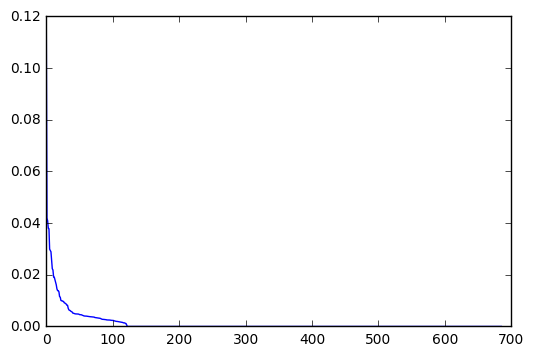



Age      000000000000000000000000000000000000000000000 # 111111111111111111111111111111111111111111111111111 ***
Out-of-bag Score: 0.147640965523
Important features: [538 552  12 465 539 558]...
['Block #', 269, ' at', array([ 5.,  3.,  3.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]
['Block #', 276, ' at', array([ 5.,  4.,  3.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]
['Block #', 6, ' at', array([ 0.,  0.,  6.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]
['Block #', 232, ' at', array([ 4.,  5.,  1.]), 'isHist:', False, ' and bin', 1, ' or stat', 1]
['Block #', 269, ' at', array([ 5.,  3.,  3.]), 'isHist:', False, ' and bin', 1, ' or stat', 1]
['Block #', 279, ' at', array([ 5.,  4.,  6.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]


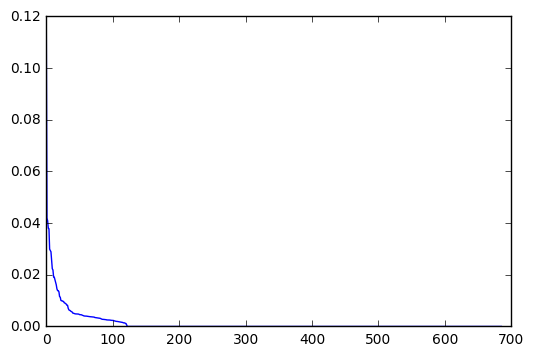



Health   0000000000000000 # 11111111111111111111111111111111111111111111111111111111111111111111111111111111 ***
Out-of-bag Score: 0.147640965523
Important features: [538 552  12 465 539 558]...
['Block #', 269, ' at', array([ 5.,  3.,  3.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]
['Block #', 276, ' at', array([ 5.,  4.,  3.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]
['Block #', 6, ' at', array([ 0.,  0.,  6.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]
['Block #', 232, ' at', array([ 4.,  5.,  1.]), 'isHist:', False, ' and bin', 1, ' or stat', 1]
['Block #', 269, ' at', array([ 5.,  3.,  3.]), 'isHist:', False, ' and bin', 1, ' or stat', 1]
['Block #', 279, ' at', array([ 5.,  4.,  6.]), 'isHist:', False, ' and bin', 0, ' or stat', 0]


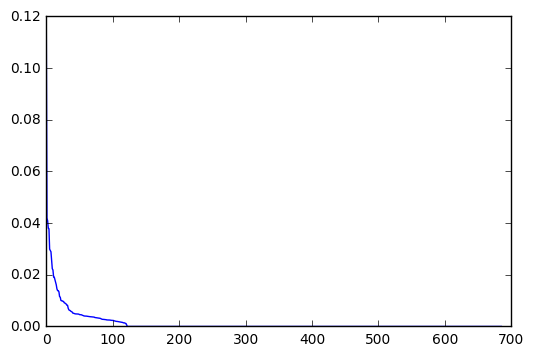

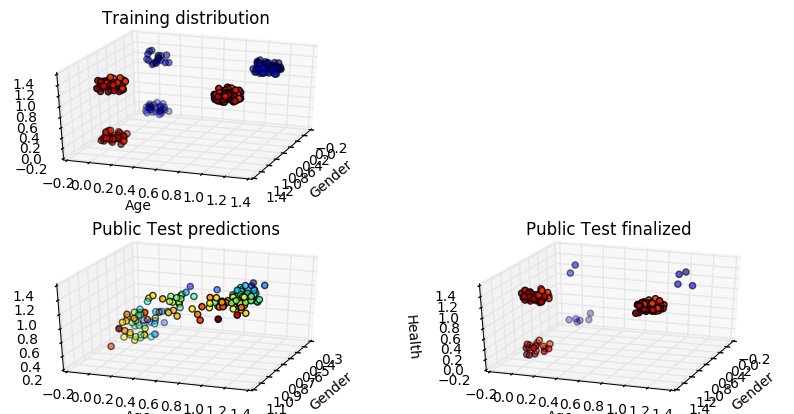

Saved predictions into output/many_hists_histsSize0smoothed_stats_nBlocks343_bSize2_divs_7_7_7_RandomForest_n80_feats0.3_msp10_max_depth2_rs1_VALIDATION_test_size0.2_n_splits7_ltsavg0.189_ltsstd0.023.csv


In [162]:
doStuff(
  preprocess="none",n_comps=25,kpcaK="poly",
  #do = "nn",nn=15,weights="distance",p=1,
  #do = "aks",n_est=20,kernel="linear",gamma=1e2,coef0=1,deg=2,k1="poly",C=1e-18,
  #do = "ks",kernel="linear",gamma=0.01/2,coef0=1,deg=2,k1="poly",C=1e-5,
  #do = "al",n_est=30,al=1e-15,
  do = "rf",n_est=80,f=0.3,msp=10,max_depth=2,rs=1,
  prepPercentage = False,
  pgah = False,
  uni = False, mcl=False,
  test_size=0.2,n_splits=7,
  msplit=70)

===================================================================================================================
### Next steps
* take a look at the empirical distribution (Anteile) of the predicted classes.
   All the real-valued predictions can be plotted in a 3D plot :)
   If there are too few (many) predictions in a class (by comparision to Anteile in training set),
   then move the closest other samples to our class (furthest of current samples to another class).
* Focus on Amygdala and Hippocampus for classification
* Use Age and Health for improving Gender Prediction, DONE, no improvement
* Use image processing features
* pie output to file and save it as well
* Wellenfeldinteraktionen (FT and Sum)
* use neural networks for spatial information
* male => more amount of grey matter
* Show the most-frequently used decision attributes for RandomForest, DONE

## TODO: Visualize important places in spherical coordinates.
* Then goo deeper in that part of the brain :)

40.0


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


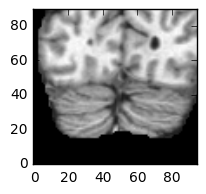

52.2222222222


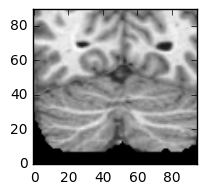

64.4444444444


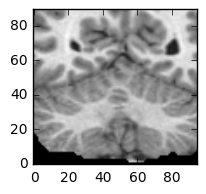

76.6666666667


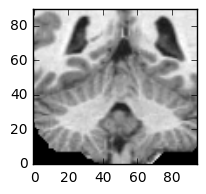

88.8888888889


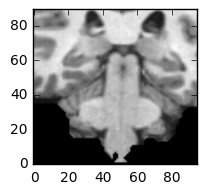

101.111111111


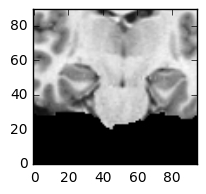

113.333333333


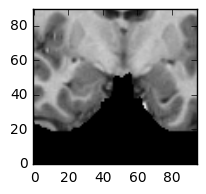

125.555555556


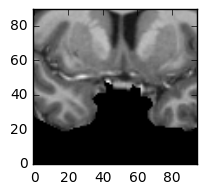

137.777777778


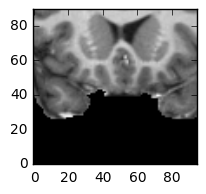

150.0


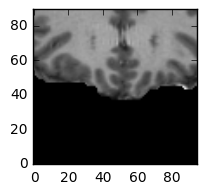

In [80]:
Xtotal,Ytotal,Ztotal = (176,208,176)
data = nib.load("set_train/train_123.nii").get_data().reshape((Xtotal,Ytotal,Ztotal))
plt.clf()
for theta in np.linspace(40,150,10):
  print theta
  plt.figure(figsize=(9,2))
  plt.imshow(data[35:130,theta,10:100].T, cmap="gray", origin="lower")
  plt.show()

In [70]:
#yt = np.random.random((1,8))
yi = yt[0]

print yt
print continousMonadic2binary(yt)

[[ 0.58653306  0.74147441  0.14442396  0.9015676   0.17841104  0.41374105
   0.1874758   0.45119953]]
[[ 0.34143874  0.46733647  0.69572908]]


In [105]:
print types
print binary2monadic(types)
r = np.random.random((1,8))
print r
print continousMonadic2binary(r)

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]
[[ 0.25008103  0.99662929  0.30960187  0.69494176  0.49207338  0.27817648
   0.8320414   0.29694763]]
[[ 0.45759358  0.51404321  0.54612675]]


In [108]:
types

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]